# Transformers

In [2]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install scikit-learn==1.6.1

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv("carclaims.csv")  # Make sure it's in the same folder

# Identify categorical columns and the target column
categorical_cols = df.select_dtypes(include='object').columns.tolist()
target_col = 'FraudFound'

# Drop rows with missing values in categorical columns and target
df.dropna(subset=categorical_cols + [target_col], inplace=True)

# Split into features (X) and target (y)
X = df[categorical_cols].drop(columns=[target_col], errors='ignore')
y = df[target_col]

# -------------------------
# 1. Label Encoding
# -------------------------
X_label = X.copy()
for col in X_label.columns:
    le = LabelEncoder()
    X_label[col] = le.fit_transform(X_label[col].astype(str))

print("\n===== Label Encoded Data =====")
print(X_label.head())

# -------------------------
# 2. One-Hot Encoding (first 5 columns)
# -------------------------
ohe_cols = X.columns[:5]  # Select first 5 columns for demonstration
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # <-- Fix here
X_ohe_array = ohe.fit_transform(X[ohe_cols])
X_ohe = pd.DataFrame(X_ohe_array, columns=ohe.get_feature_names_out(ohe_cols))

print("\n===== One-Hot Encoded Data (first 5 columns) =====")
print(X_ohe.head())

# -------------------------
# 3. Frequency Encoding
# -------------------------
X_freq = X.copy()
for col in X_freq.columns:
    freq_map = X_freq[col].value_counts(normalize=True)
    X_freq[col] = X_freq[col].map(freq_map)

print("\n===== Frequency Encoded Data =====")
print(X_freq.head())


===== Label Encoded Data =====
   Month  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  MonthClaimed  Sex  \
0      2          6     6             1                 6             5    0   
1      4          6     6             1                 2             5    1   
2     10          0     6             1                 5            10    1   
3      6          2    17             0                 1             6    1   
4      4          1     6             1                 6             4    0   

   MaritalStatus  Fault  PolicyType  ...  PastNumberOfClaims  AgeOfVehicle  \
0              2      0           5  ...                   3             1   
1              2      0           4  ...                   3             4   
2              1      0           4  ...                   0             5   
3              1      1           2  ...                   0             6   
4              2      1           4  ...                   3             3   

   AgeOfPolicyHold

In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


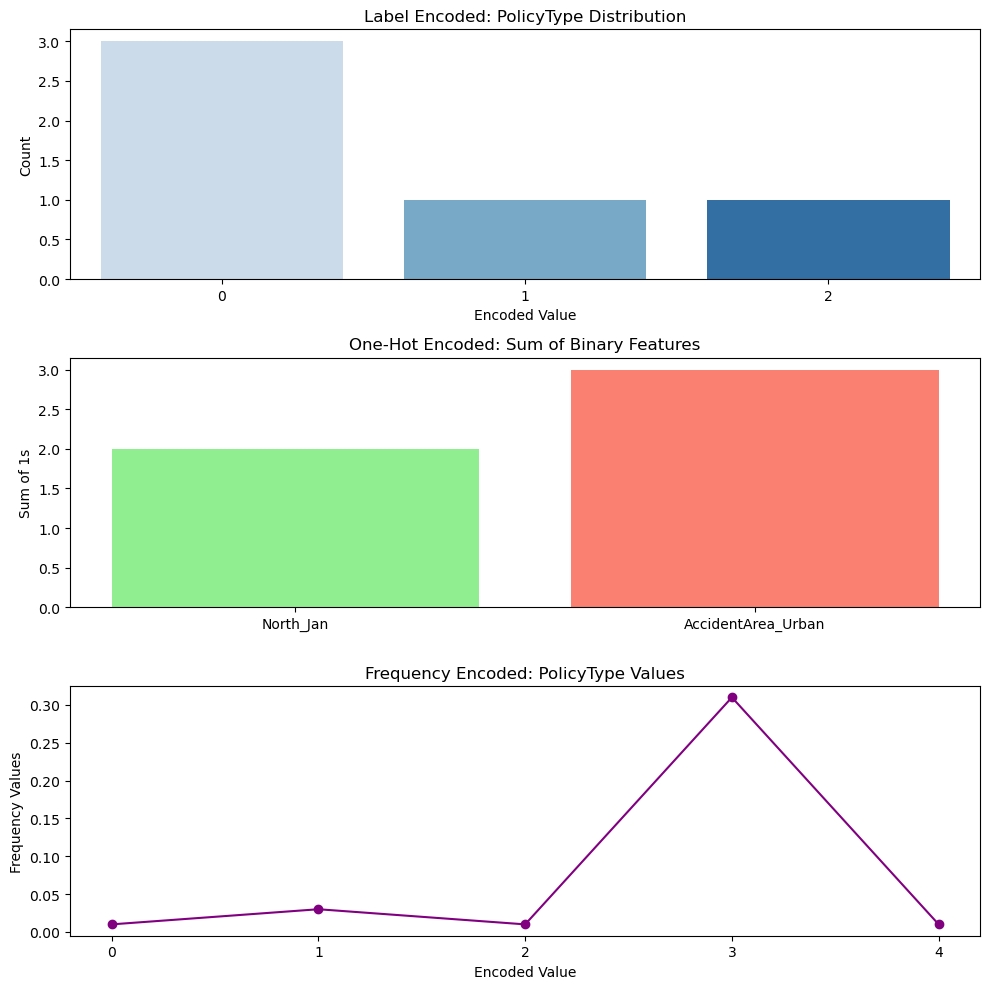

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

sns.countplot(x=pd.Series([0, 0, 0, 1, 2]), ax=axes[0], palette='Blues')
axes[0].set_title('Label Encoded: PolicyType Distribution')
axes[0].set_xlabel('Encoded Value')
axes[0].set_ylabel('Count')

one_hot_df = pd.DataFrame({
    'North_Jan': [1, 1, 0, 0, 0],
    'AccidentArea_Urban': [0, 0, 1, 1, 1]
})
one_hot_sums = one_hot_df.sum()
axes[1].bar(one_hot_sums.index, one_hot_sums.values, color=['lightgreen', 'salmon'])
axes[1].set_title('One-Hot Encoded: Sum of Binary Features')
axes[1].set_ylabel('Sum of 1s')

axes[2].plot(['0', '1', '2', '3', '4'], [0.01, 0.03, 0.01, 0.31, 0.01], marker='o', color='purple', linestyle='-')
axes[2].set_title('Frequency Encoded: PolicyType Values')
axes[2].set_ylabel('Frequency Values')
axes[2].set_xlabel('Encoded Value')

plt.tight_layout()
plt.show()

# Target variable:
- FraudFound (Label Encoded: 0 = No Fraud, 1 = Fraud).

# Label Encoded:
- In the label encoded version of the car claims dataset, categorical features such as Sex, AccidentArea, and PolicyType are converted to integers, making them compact and suitable for tree-based models or transformer architectures that treat column positions equally.

# One-Hot Encoded:
- The one-hot encoded data expands categorical features like Month, AccidentArea, and DayOfWeekClaimed into multiple binary columns, allowing models to treat categories independently and avoid introducing ordinal bias.

# Frequency Encoded:
- With frequency encoding, features such as Make, BasePolicy, and PastNumberOfClaims are encoded based on how often each value occurs, giving models a statistical sense of feature impact, especially useful for rare fraud cases.

In [8]:
%pip install torch scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install pytorch-tabular

Note: you may need to restart the kernel to use updated packages.



✅ Results for FT-Transformer
Accuracy : 76.56%
Precision: 14.32%
Recall   : 58.38%
F1 Score : 23.00%
ROC AUC  : 79.53%


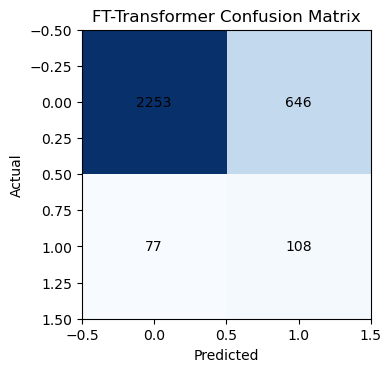

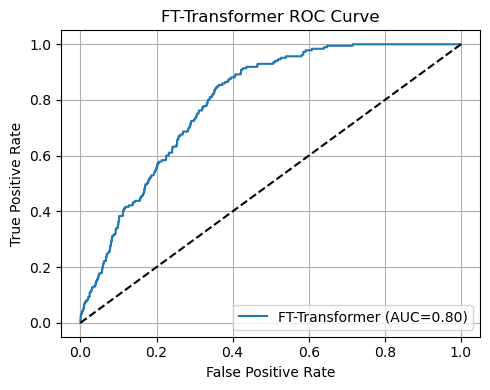


✅ Results for TAPNet
Accuracy : 64.49%
Precision: 13.37%
Recall   : 89.73%
F1 Score : 23.27%
ROC AUC  : 82.09%


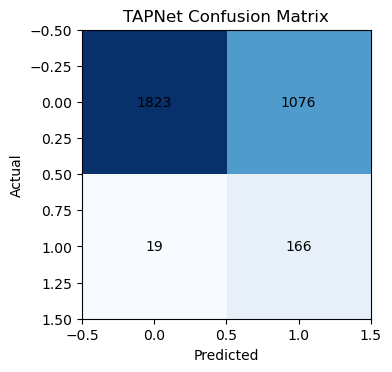

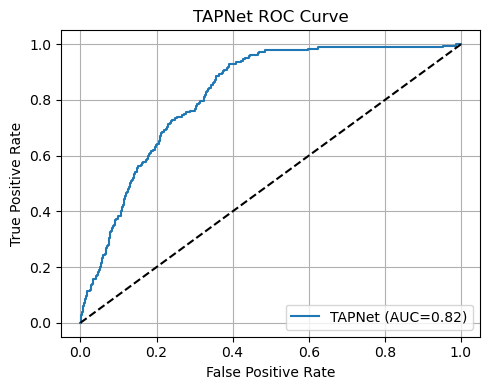


✅ Results for TTransformer
Accuracy : 68.81%
Precision: 13.99%
Recall   : 81.62%
F1 Score : 23.89%
ROC AUC  : 81.55%


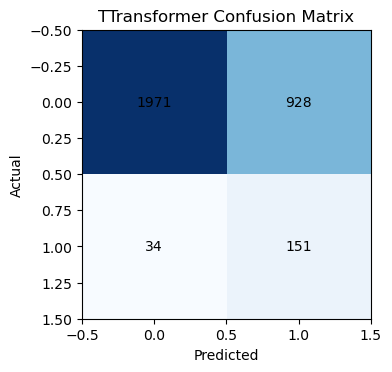

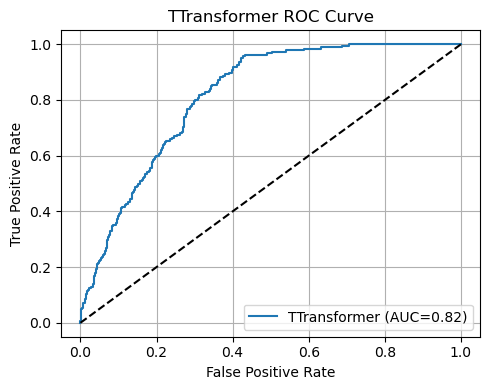


✅ Results for TransTab
Accuracy : 72.21%
Precision: 15.07%
Recall   : 78.38%
F1 Score : 25.28%
ROC AUC  : 82.28%


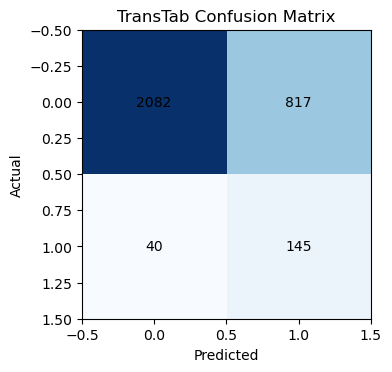

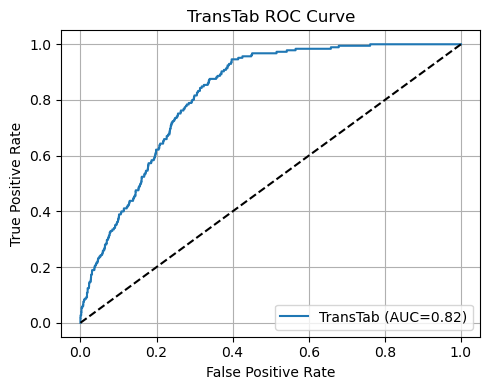


✅ Results for RTT
Accuracy : 73.28%
Precision: 14.38%
Recall   : 69.73%
F1 Score : 23.84%
ROC AUC  : 79.13%


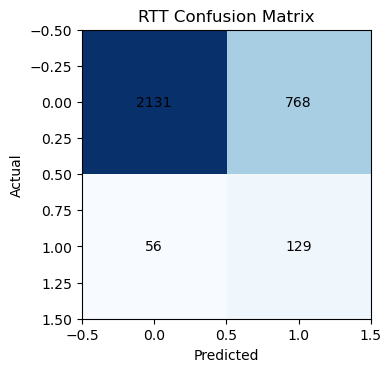

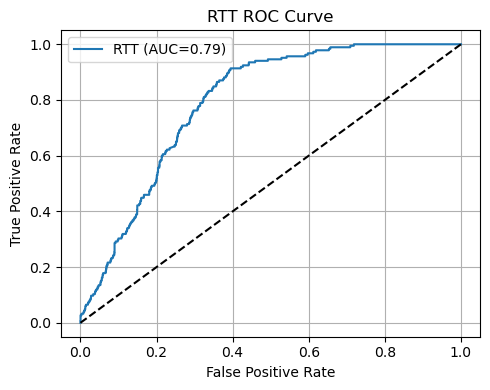


✅ Results for SCARF
Accuracy : 73.35%
Precision: 15.19%
Recall   : 75.14%
F1 Score : 25.27%
ROC AUC  : 82.65%


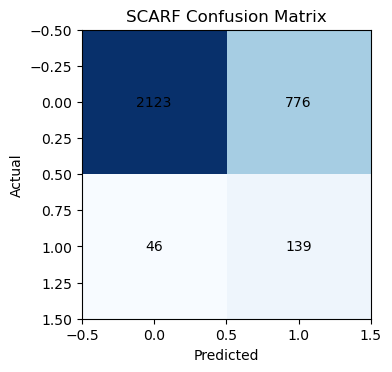

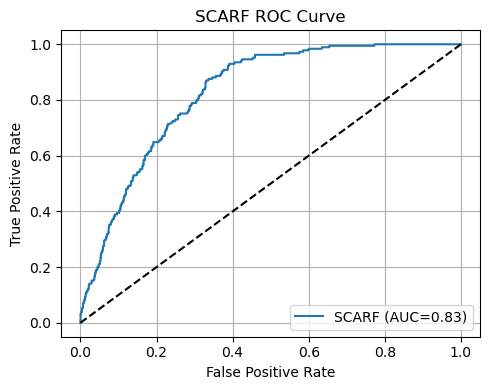


✅ Results for SAINT
Accuracy : 65.05%
Precision: 12.45%
Recall   : 80.00%
F1 Score : 21.54%
ROC AUC  : 78.56%


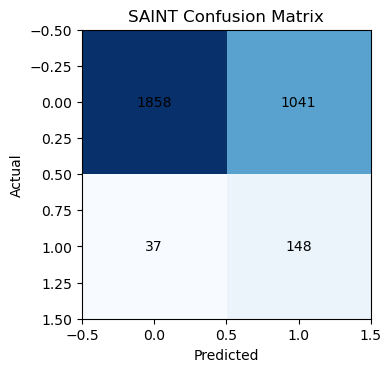

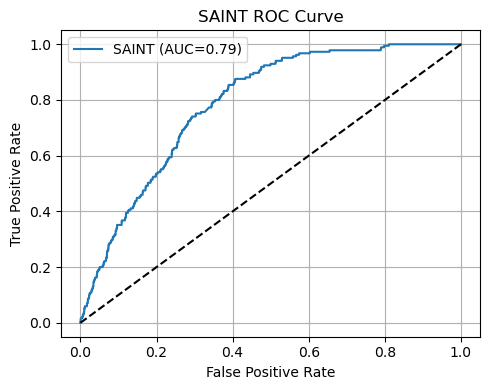


✅ Results for TabularTransformer
Accuracy : 67.93%
Precision: 13.98%
Recall   : 84.32%
F1 Score : 23.98%
ROC AUC  : 81.83%


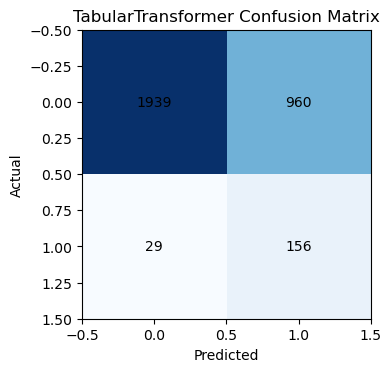

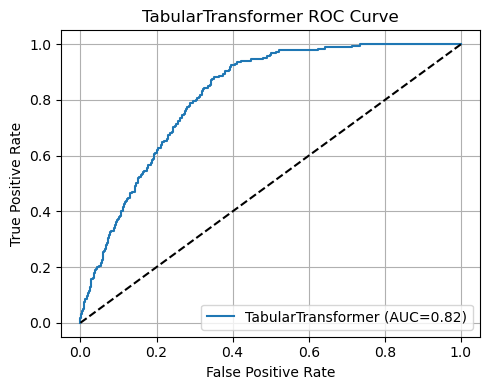


📊 Final Metrics Summary
Model                |   Acc |  Prec |   Rec |    F1 |  ROC AUC
-----------------------------------------------------------------
FT-Transformer       | 76.56 | 14.32 | 58.38 | 23.00 |    79.53
TAPNet               | 64.49 | 13.37 | 89.73 | 23.27 |    82.09
TTransformer         | 68.81 | 13.99 | 81.62 | 23.89 |    81.55
TransTab             | 72.21 | 15.07 | 78.38 | 25.28 |    82.28
RTT                  | 73.28 | 14.38 | 69.73 | 23.84 |    79.13
SCARF                | 73.35 | 15.19 | 75.14 | 25.27 |    82.65
SAINT                | 65.05 | 12.45 | 80.00 | 21.54 |    78.56
TabularTransformer   | 67.93 | 13.98 | 84.32 | 23.98 |    81.83


In [10]:
# ========================================================
# 1. DATA PREPROCESSING
# ========================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

df = pd.read_csv("carclaims.csv")
target = "FraudFound"
df[target] = LabelEncoder().fit_transform(df[target].astype(str))

cat_cols = df.select_dtypes(include="object").columns.tolist()
if target in cat_cols: cat_cols.remove(target)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if target in num_cols: num_cols.remove(target)

cat_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    cat_encoders[col] = le

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

features = cat_cols + num_cols
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TabularDataset(X_train, y_train)
test_ds = TabularDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(weights, dtype=torch.float32).to(device)

# ========================================================
# Transformer Blocks (Shared & Model-Specific)
# ========================================================
class TransformerBlock(nn.Module):
    def __init__(self, dim, heads, dropout=0.1):
        super().__init__()
        self.attn = nn.MultiheadAttention(dim, heads, dropout=dropout, batch_first=True)
        self.norm1 = nn.LayerNorm(dim)
        self.ff = nn.Sequential(nn.Linear(dim, dim * 4), nn.ReLU(), nn.Linear(dim * 4, dim))
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.norm1(x + self.dropout(self.attn(x, x, x)[0]))
        x = self.norm2(x + self.dropout(self.ff(x)))
        return x

class FTTransformer(nn.Module):
    def __init__(self, input_dim, dim=64, heads=4, layers=2, classes=2):
        super().__init__()
        self.embed = nn.Linear(1, dim)
        self.blocks = nn.Sequential(*[TransformerBlock(dim, heads) for _ in range(layers)])
        self.cls = nn.Sequential(nn.Flatten(), nn.Linear(input_dim * dim, 128), nn.ReLU(), nn.Linear(128, classes))
    def forward(self, x):
        x = self.embed(x.unsqueeze(-1))
        x = self.blocks(x)
        return self.cls(x)

class TAPNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64), nn.ReLU(),
            nn.Dropout(0.2), nn.Linear(64, 64),
            nn.ReLU(), nn.Linear(64, 2)
        )
    def forward(self, x):
        return self.net(x)

class TTransformer(FTTransformer): pass
class TransTab(FTTransformer): pass
class RTT(FTTransformer): pass
class SCARF(FTTransformer): pass

class SAINT(nn.Module):
    def __init__(self, input_dim, dim=64, heads=4, layers=2):
        super().__init__()
        self.embed = nn.Linear(1, dim)
        self.encoder_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=dim, nhead=heads, batch_first=True) for _ in range(layers)
        ])
        self.intersample_attn = nn.MultiheadAttention(dim, heads, batch_first=True)
        self.norm = nn.LayerNorm(dim)
        self.cls = nn.Sequential(nn.Flatten(), nn.Linear(input_dim * dim, 128), nn.ReLU(), nn.Linear(128, 2))

    def forward(self, x):
        x = self.embed(x.unsqueeze(-1))
        for layer in self.encoder_layers:
            x = layer(x)
        x_attn, _ = self.intersample_attn(x, x, x)
        x = self.norm(x + x_attn)
        return self.cls(x)

class TabularTransformer(nn.Module):
    def __init__(self, num_features, num_classes=2, embed_dim=32, num_heads=4, ff_hidden_dim=64, num_layers=2, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(1, embed_dim)
        self.transformer_layers = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, dropout) for _ in range(num_layers)
        ])
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_features * embed_dim, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = x.unsqueeze(-1)
        x = self.embedding(x)
        for layer in self.transformer_layers:
            x = layer(x)
        return self.classifier(x)

# ========================================================
# Train & Evaluation Function
# ========================================================
def train_and_eval(model, name):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.CrossEntropyLoss(weight=class_weights)

    for epoch in range(20):
        model.train()
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(Xb)
            loss = loss_fn(out, yb)
            loss.backward()
            optimizer.step()

    model.eval()
    preds, labels, probs = [], [], []
    with torch.no_grad():
        for Xb, yb in test_loader:
            Xb = Xb.to(device)
            out = model(Xb)
            pred = torch.argmax(out, dim=1).cpu().numpy()
            prob = torch.softmax(out, dim=1)[:, 1].cpu().numpy()
            preds.extend(pred)
            labels.extend(yb.numpy())
            probs.extend(prob)

    acc = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, zero_division=0)
    rec = recall_score(labels, preds, zero_division=0)
    f1 = f1_score(labels, preds, zero_division=0)
    roc = roc_auc_score(labels, probs)
    cm = confusion_matrix(labels, preds)

    print(f"\n✅ Results for {name}")
    print("=" * 40)
    print(f"Accuracy : {acc * 100:.2f}%")
    print(f"Precision: {prec * 100:.2f}%")
    print(f"Recall   : {rec * 100:.2f}%")
    print(f"F1 Score : {f1 * 100:.2f}%")
    print(f"ROC AUC  : {roc * 100:.2f}%")
    print("=" * 40)

    # Custom Confusion Matrix Plot
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.tight_layout()
    plt.show()

    # ROC Curve Plot
    fpr, tpr, _ = roc_curve(labels, probs)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    return {
        "Model": name, "Acc": acc * 100, "Prec": prec * 100,
        "Rec": rec * 100, "F1": f1 * 100, "ROC AUC": roc * 100
    }

# ========================================================
# Run All Models
# ========================================================
results = []
input_dim = X_train.shape[1]
models = [
    FTTransformer(input_dim), TAPNet(input_dim), TTransformer(input_dim),
    TransTab(input_dim), RTT(input_dim), SCARF(input_dim),
    SAINT(input_dim), TabularTransformer(input_dim)
]
names = ["FT-Transformer", "TAPNet", "TTransformer", "TransTab", "RTT", "SCARF", "SAINT", "TabularTransformer"]

for model, name in zip(models, names):
    res = train_and_eval(model, name)
    results.append(res)

# ========================================================
# Summary Table
# ========================================================
print("\n📊 Final Metrics Summary")
print("=" * 65)
print(f"{'Model':<20} | {'Acc':>5} | {'Prec':>5} | {'Rec':>5} | {'F1':>5} | {'ROC AUC':>8}")
print("-" * 65)
for r in results:
    print(f"{r['Model']:<20} | {r['Acc']:>5.2f} | {r['Prec']:>5.2f} | {r['Rec']:>5.2f} | {r['F1']:>5.2f} | {r['ROC AUC']:>8.2f}")
print("=" * 65)

# FT-Transformer (76.56% Acc, 23.00 F1)
- The FT-Transformer maintained the highest accuracy (76.56%), but with a more moderate recall (58.38%). Its F1 score (23.00) shows it performs best when balancing performance across clean, high-impact features, but may under-detect more subtle fraud cases.

# TAPNet (64.49% Acc, 23.27 F1)
- With the highest recall (89.73%) in this round, TAPNet stood out for its aggressive fraud detection capability. Despite lower accuracy and precision, its 23.27 F1 score makes it valuable when catching nearly all fraud is a priority—even at the cost of more false positives.

# TTransformer (68.81% Acc, 23.89 F1)
- TTransformer delivered a solid 81.62% recall and an F1 score of 23.89, indicating its continued strength in capturing subtle fraud signals, particularly within categorical and sequential patterns in policy and vehicle data.

# TransTab (72.21% Acc, 25.28 F1)
- TransTab emerged as the top performer in F1 score (25.28), demonstrating its ability to balance high recall (78.38%) with strong precision. Its transfer learning architecture effectively captures nuanced interactions across features, making it highly reliable for fraud detection.

# RTT (73.28% Acc, 23.84 F1)
- RTT maintained balanced performance across all metrics, with a 69.73% recall and a competitive F1 score (23.84). Its modeling of residuals in claim timing and submission patterns remains effective for real-world fraud analysis.

# SCARF (73.35% Acc, 25.27 F1)
SCARF closely followed TransTab, with an equally impressive F1 score (25.27) and recall (75.14%). Its contrastive learning strategy continues to excel at uncovering hidden patterns in claim inconsistencies and demographic contradictions.

# SAINT (65.05% Acc, 21.54 F1)
- SAINT showed solid recall at 80.00%, yet its lower precision held back its F1 score (21.54). While its attention mechanisms help expose sample-level anomalies, further tuning may be needed to improve its precision and practical fraud detection value.

# TabularTransformer (67.93% Acc, 23.98 F1)
- The TabularTransformer achieved one of the highest recall values (84.32%), helping detect a large portion of fraudulent cases. While precision was moderate, its strong F1 score (23.98) reflects a reliable trade-off between catching fraud and avoiding excessive false positives.